In [6]:
import numpy as np
import os

import json
import sys

from tqdm import tqdm
config_file = "config_kdv.json"

with open(config_file, "r") as f:
    config = json.load(f)["sin"]

data_path = config["data_settings"]["data_path"]
weights_path = config["nn_settings"]["weights_path"]
figures_path = config["data_settings"]["figures_path"]



In [14]:
import matplotlib.pyplot as plt

# Controllability
If you have solved the tracking problems over different K settings and saved results by the corresponding file name, you can run the following code to see the comparison. 


In [31]:
results_dict_64 = np.load(os.path.join(data_path, "K_layer/results_klayer64.npy"), allow_pickle=True)
eig_value_64 = results_dict_64[()]["eigen_value"]
pk_opt_soln_mass_64 = results_dict_64[()]["pk_opt_soln_mass"]
pk_opt_soln_momentum_64 = results_dict_64[()]["pk_opt_soln_momentum"]
    


In [32]:

results_dict_128 = np.load(
    os.path.join(data_path, "K_layer/results_klayer128.npy"), allow_pickle=True
)
eig_value_128 = results_dict_128[()]["eigen_value"]
pk_opt_soln_mass_128 = results_dict_128[()]["pk_opt_soln_mass"]
pk_opt_soln_momentum_128 = results_dict_128[()]["pk_opt_soln_momentum"]


In [33]:
results_dict_256 = np.load(
    os.path.join(data_path, "K_layer/results_klayer256.npy"), allow_pickle=True
)

eig_value_256 = results_dict_256[()]["eigen_value"]
pk_opt_soln_mass_256 = results_dict_256[()]["pk_opt_soln_mass"]
pk_opt_soln_momentum_256 = results_dict_256[()]["pk_opt_soln_momentum"]


In [34]:
ticks_font = 14

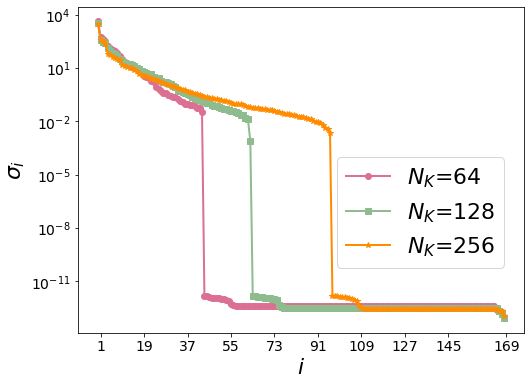

In [35]:
# Eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(eig_value_64, linewidth=2, label=r"$N_{K}$=64", marker="o", color="palevioletred")
plt.plot(eig_value_128, linewidth=2, label=r"$N_{K}$=128", marker="s", color="darkseagreen")
plt.plot(eig_value_256, linewidth=2, label=r"$N_{K}$=256", marker="*", color="darkorange")

plt.yscale("log")

# custom_xticks = np.linspace(1, 169, 10)

total_ticks = 10
start, end = 1, 169
step = (end - start) // (total_ticks - 1)  # Calculate step to get roughly 10 ticks

custom_xticks = np.arange(start, end + 1, step)
custom_xticks[-1] = end  # Ensure the last tick is exactly 169

plt.xticks(custom_xticks, fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)

# plt.xlim(0,37)
# plt.ylim(1e-14, 1e5)
plt.xlabel(r"$i$", fontsize=22)
plt.ylabel(r"$\sigma_{i}$", fontsize=22)
plt.legend(fontsize=22, loc=(0.58, 0.2))



In [52]:
def check_index(eig_value):
    for i in range(eig_value.shape[0]-1):
        if eig_value[i+1] < 1e-5 and eig_value[i] > 1e-5:
            print(i)

In [53]:
check_index(eig_value_64)
check_index(eig_value_128)
check_index(eig_value_256)


43
63
96


In [36]:
ref_dict = np.load(
    os.path.join(data_path, "K_layer/ref_dict.npy"), allow_pickle=True
)

mass_ref = ref_dict[()]["mass_ref"]
momentum_ref = ref_dict[()]["momentum_ref"]

In [37]:
ref_color = 'black'

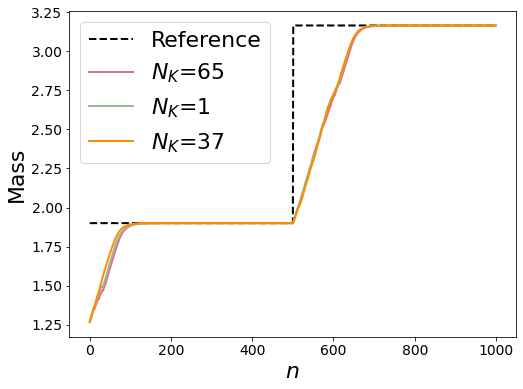

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(mass_ref, label="Reference", linestyle="--", color=ref_color, linewidth=2)

plt.plot(pk_opt_soln_mass_64, linewidth=2, label=r"$N_{K}$=65", color="palevioletred")
plt.plot(pk_opt_soln_mass_128, linewidth=2, label=r"$N_{K}$=1", color="darkseagreen")
plt.plot(pk_opt_soln_mass_256, linewidth=2, label=r"$N_{K}$=37", color="darkorange")

plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)


plt.xlabel(r"$n$", fontsize=22)
plt.ylabel("Mass", fontsize=22)
plt.legend(fontsize=22)


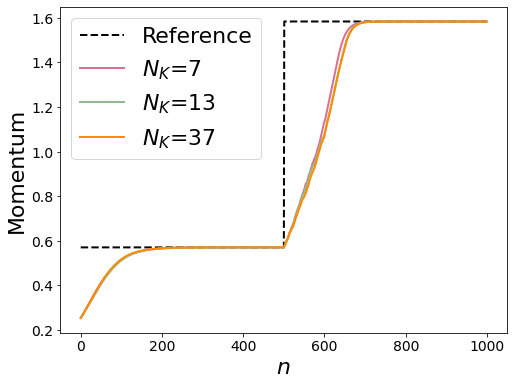

In [41]:

plt.figure(figsize=(8, 6))
plt.plot(momentum_ref, label="Reference", linestyle="--", color=ref_color, linewidth=2)

plt.plot(pk_opt_soln_momentum_64, linewidth=2, label=r"$N_{K}$=7", color="palevioletred")
plt.plot(pk_opt_soln_momentum_128, linewidth=2, label=r"$N_{K}$=13", color="darkseagreen")
plt.plot(pk_opt_soln_momentum_256, linewidth=2, label=r"$N_{K}$=37", color="darkorange")


plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)

plt.xlabel(r"$n$", fontsize=22)
plt.ylabel("Momentum", fontsize=22)
plt.legend(fontsize=22)